Simple Bettor bust chance: 0.0
Simple Bettor profit chance: 38.269999999999996
Doubler Bettor bust chance: 29.080000000000002
Doubler Bettor profit chance: 62.59


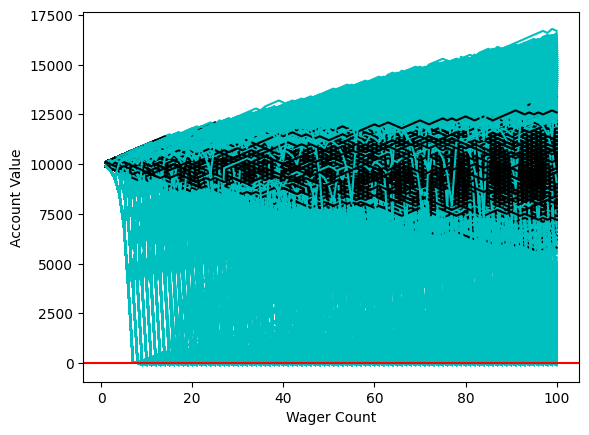

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib 
import time

sampleSize = 10000

startingFunds = 10000
wagerSize = 100
wagerCount = 100
def roll_Dice():
    roll = random.randint(1, 100)
    if roll == 100:
        #print(roll, 'roll was 100, you lose. What are the odds?! Play Again!')
        return False
    elif roll <= 50:
        #print(roll, 'roll was 1-50, you lose. Play Again!')
        return False
    elif 100 > roll > 50:
        #print(roll, 'roll was 51-99, you win! *Lights flash* Play More!')
        return True

def doubler_bettor(funds, initial_wager, wager_count, color):
    value = funds
    wager = initial_wager
    global doubler_busts
    global doubler_profits
    wX = []
    vY = []
    
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager
    
    while currentWager <= wager_count:
        if previousWager == 'win':
            #print('we won the last wager, yay!')
            if roll_Dice():
                value += wager
                #print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'lose'
                #print(value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print('broke after', currentWager, 'wagers')
                    doubler_busts += 1
                    break
        elif previousWager == 'lose':
            #print('we lost the last wager, double up! Thats the smart play!')
            if roll_Dice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                #print('we won',wager)
                value += wager
                #print(value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                #print('we lost',wager)
                value -= wager
                previousWager = 'lose'
                
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)    
                if value < 0:
                    #print('broke after', currentWager, 'wagers')
                    doubler_busts += 1
                    break

                #print(value)
                

        currentWager += 1
    #print(value)

    plt.plot(wX, vY,color)
    if value > funds:
        doubler_profits += 1


def simple_bettor(funds, initial_wager, wager_count,color):
    global simple_busts
    global simple_profits
    value = funds
    wager = initial_wager
    
    wX = []
    vY = []
    
    currentWager = 1
    
    while currentWager <= wager_count:
        if roll_Dice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

        currentWager += 1

    if value <= 0:
        simple_busts += 1
    #print('Funds:', value)

    plt.plot(wX, vY,color)
    if value > funds:
        simple_profits += 1

x = 0
broke_count = 0

simple_busts = 0.0
doubler_busts = 0.0
simple_profits = 0.0
doubler_profits = 0.0



while x < sampleSize:
    simple_bettor(startingFunds,wagerSize,wagerCount,'k')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'c')
    x += 1
print('Simple Bettor bust chance:', (simple_busts/sampleSize) *100.00)
print('Simple Bettor profit chance:', (simple_profits/sampleSize) *100.00)
print('Doubler Bettor bust chance:', (doubler_busts/sampleSize) *100.00)
print('Doubler Bettor profit chance:', (doubler_profits/sampleSize) *100.00)


plt.axhline(0, color = 'r')
plt.xlabel('Wager Count')
plt.ylabel('Account Value')
plt.show()


    
        

